In [2]:
using Polynomials,SpecialPolynomials,Plots,LinearAlgebra,CSV,DataFrames,Statistics

## Zadanie 1 - wielomiany Hermite'a

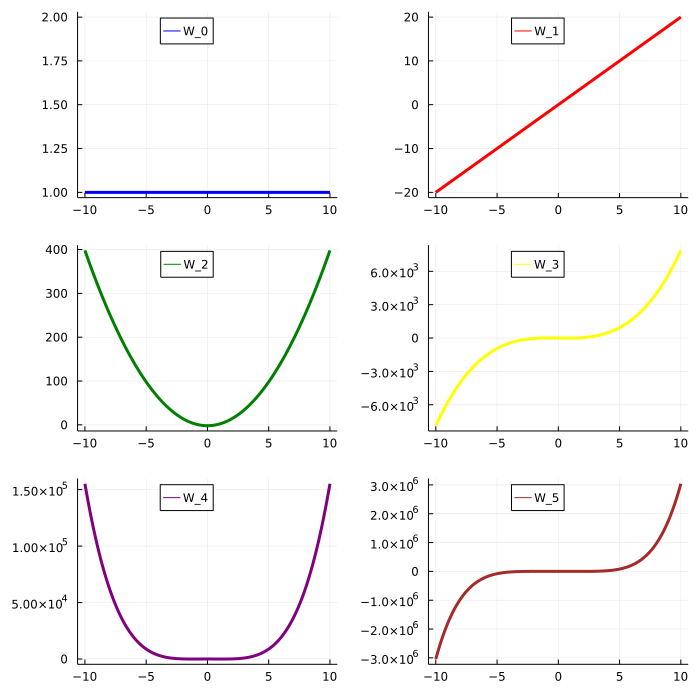

In [3]:
xs = -10:0.1:10
h0 = basis(Hermite,0)
h1 = basis(Hermite,1)
h2 = basis(Hermite,2)
h3 = basis(Hermite,3)
h4 = basis(Hermite,4)
h5 = basis(Hermite,5)
ys0 = [h0(x) for x in xs]
ys1 = [h1(x) for x in xs]
ys2 = [h2(x) for x in xs]
ys3 = [h3(x) for x in xs]
ys4 = [h4(x) for x in xs]
ys5 = [h5(x) for x in xs]
plot(
    size = (700,700),
    linewidth=3,
    xs,
    [ys0,ys1,ys2,ys3,ys4,ys5],
    layout=grid(3,2),
    color = [:blue :red :green :yellow :purple :brown],
    label = ["W_0" "W_1" "W_2" "W_3" "W_4" "W_5"],
    legend_position = :top
)

## Zadanie 2 - funkcje aproksymujące

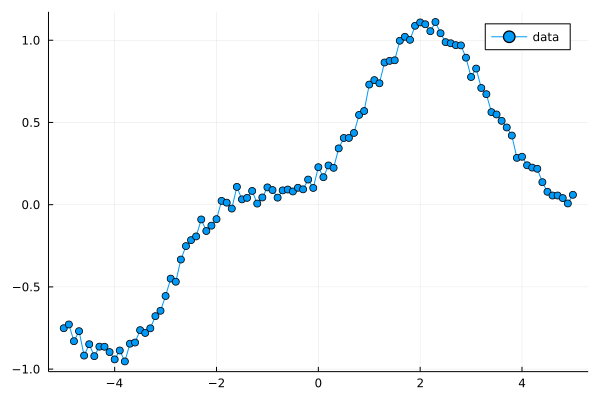

In [5]:
xs = -5:0.1:5
ys = sin.(xs/2 .+.5).^3 .+ rand(length(xs))/7;
plot(xs, ys, markershape=:circle, label = "data")

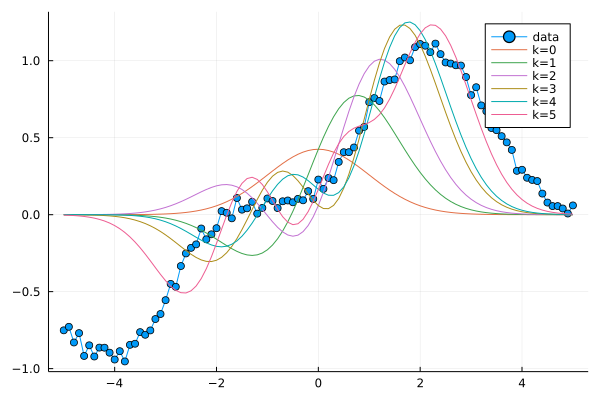

In [6]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end
ys0 = base_fun(0,xs)
ys1 = base_fun(1, xs)
ys2 = base_fun(2, xs)
ys3 = base_fun(3, xs)
ys4 = base_fun(4, xs)
ys5 = base_fun(5, xs)
c0 = dot(ys, ys0)
c1 = dot(ys, ys1)
c2 = dot(ys, ys2)
c3 = dot(ys, ys3)
c4 = dot(ys, ys4)
c5 = dot(ys, ys5)
ysf0 = c0 * ys0
ysf1 = c1 * ys1
ysf2 = c2 * ys2
ysf3 = c3 * ys3
ysf4 = c4 * ys4
ysf5 = c5 * ys5
ysf01 = ysf0 + ysf1
ysf012 = ysf01 + ysf2
ysf0123 = ysf012 + ysf3
ysf01234 = ysf0123 + ysf4
ysf012345 = ysf01234 + ysf5
plot!(xs, ysf0, label="k=0")
plot!(xs, ysf01, label="k=1")
plot!(xs, ysf012, label="k=2")
plot!(xs, ysf0123, label="k=3")
plot!(xs, ysf01234, label="k=4")
plot!(xs, ysf012345, label="k=5")
# plot(
#     xs,
#     [ys0,ys1,ys2, ys3,ys4,ys5],
#     layout = (3,2),
#     size = (600,1000),
#     color = ["red" "blue" "yellow" "green" "purple" "brown"]
# )

## Zadanie 3 - ortogonalność wektorów

In [5]:
xs = -2:0.1:2
b0 = [h0(x) for x in xs]
b1 = [h1(x) for x in xs]
b2 = [h2(x) for x in xs]
b3 = [h3(x) for x in xs]
b4 = [h4(x) for x in xs]
b5 = [h5(x) for x in xs]

not_wage = Array{Float64, 2}(undef, 6, 6); 
with_wage = Array{Float64, 2}(undef, 6, 6); 
for (i, b_i) in enumerate([b0, b1, b2, b3, b4, b5]) 
    for (j, b_j) in enumerate([b0, b1, b2, b3, b4, b5])
        not_wage[i,j] = dot(b_i, b_j)
    end
end
for (i, ys_i) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5]) 
    for (j, ys_j) in enumerate([ys0, ys1, ys2, ys3, ys4, ys5])
        with_wage[i,j] = dot(ys_i, ys_j)
    end
end
not_wage

6×6 Matrix{Float64}:
  41.0             -8.88178e-16  …     49.3312           -2.84217e-14
  -8.88178e-16    229.6                 5.68434e-14   -4768.28
 147.6              2.13163e-14      2612.51              1.47793e-12
  -7.10543e-15    934.931               9.09495e-13  -25596.8
  49.3312           5.68434e-14     24500.7              -2.27374e-13
  -2.84217e-14  -4768.28         …     -2.27374e-13       1.85742e5

In [6]:
with_wage

6×6 Matrix{Float64}:
  1.0           5.70888e-18  -3.25356e-11  …  -4.52405e-10  -1.32765e-17
  5.70888e-18   1.0           8.46587e-18     -1.2456e-19   -9.92118e-9
 -3.25356e-11   8.46587e-18   1.0             -1.67261e-8   -1.74813e-18
  5.32557e-18  -9.61163e-10  -7.22228e-18     -2.57263e-18  -2.04018e-7
 -4.52405e-10  -1.2456e-19   -1.67261e-8       1.0          -8.55609e-19
 -1.32765e-17  -9.92118e-9   -1.74813e-18  …  -8.55609e-19   1.0

Widzimy, że macierz dla wektorów znormalizowanych jest symetryczna, a na przekątnych mamy wartości 1, zatem są one wektorami ortonormalnymi.

## Zadanie 4 - aproksymacja zespołu QRS

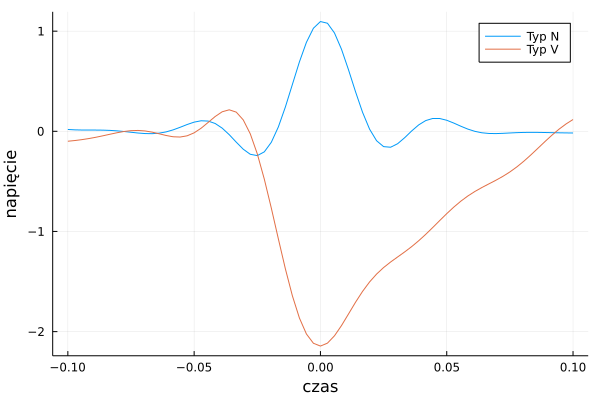

In [9]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

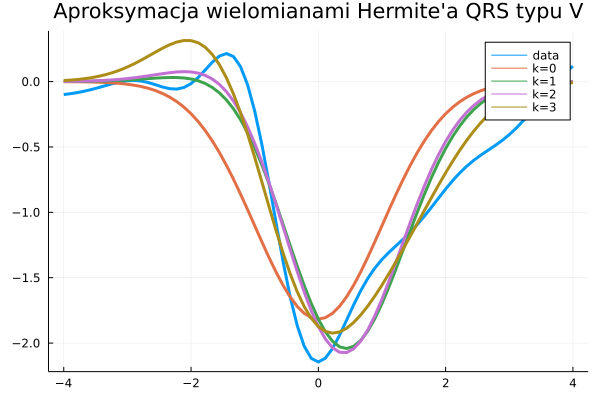

In [10]:
xx_ekg = ekg_data.time*40
yy_ekgV = ekg_data.signalV
ys0 = base_fun(0,xx_ekg)
ys1 = base_fun(1, xx_ekg)
ys2 = base_fun(2, xx_ekg)
ys3 = base_fun(3, xx_ekg)
c0 = dot(yy_ekgV, ys0)
c1 = dot(yy_ekgV, ys1)
c2 = dot(yy_ekgV, ys2)
c3 = dot(yy_ekgV, ys3)
V0 = c0 * ys0
V1 = c1 * ys1
V2 = c2 * ys2
V3 = c3 * ys3
V01 = V0 + V1
V012 = V01 + V2
V0123 = V012 + V3
plot(
    xx_ekg, 
    [yy_ekgV,V0,V01,V012,V0123],
    label=["data" "k=0" "k=1" "k=2" "k=3"],
    linewidth=3,
    title="Aproksymacja wielomianami Hermite'a QRS typu V"
)

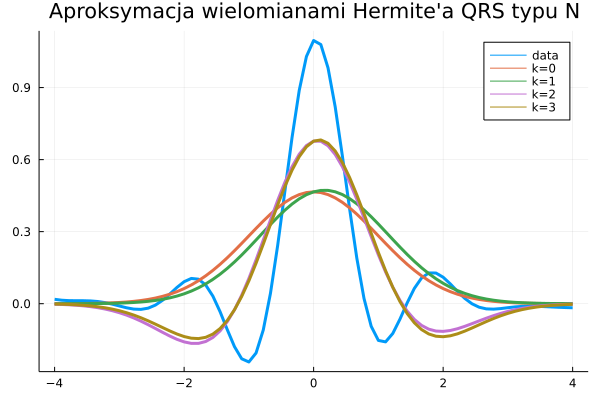

In [20]:
yy_ekgN = ekg_data.signalN
n = length(xx_ekg)
approx = [zeros(n) for _ in 0:20]
for i in 0:10
    y = base_fun(i,xx_ekg)
    c = dot(yy_ekgN,y)
    a = c * y
    approx[i+1] = a
end
approx[12] = approx[1] + approx[2]
for i in 3:11
    approx[i+10] = approx[i] + approx[i+9]
end
plot(
    xx_ekg, 
    [yy_ekgN,approx[1],approx[12],approx[13],approx[14]],
    label=["data" "k=0" "k=1" "k=2" "k=3"],
    linewidth=3,
    title="Aproksymacja wielomianami Hermite'a QRS typu N"
)

## Zadanie 5 - błąd aproksymacji

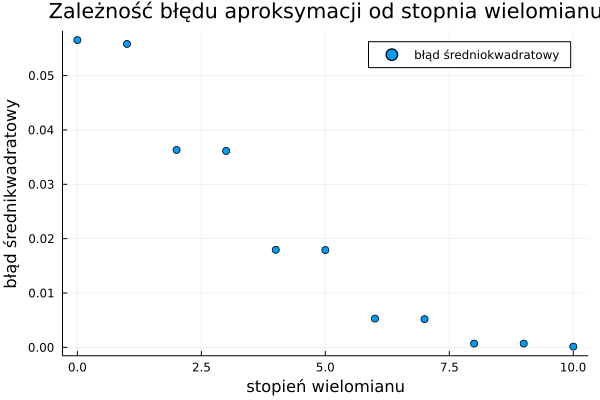

In [21]:
mse(y1, y2) = mean((y1-y2).^2)
epsilon = zeros(0)
append!(epsilon,mse(yy_ekgN,approx[1]))
for i in 12:21
    append!(epsilon,mse(yy_ekgN,approx[i]))
end
scatter( 
    0:1:10,
    epsilon,
    xlabel="stopień wielomianu",
    ylabel="błąd średnikwadratowy",
    label="błąd średniokwadratowy",
    title="Zależność błędu aproksymacji od stopnia wielomianu"
)

Najlepiej użyć aproksymacji wielomianem stopnia 9